In [1]:
import os
import math 
import numpy as np
import pandas as pd
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.float_format','{:.4f}'.format)

In [2]:
url='http://hilpisch.com/aiif_eikon_eod_data.csv'
symbol='EUR='

In [3]:
data=pd.DataFrame(pd.read_csv(url,index_col=0,parse_dates=True).dropna()[symbol])

In [4]:
data

,EUR=
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR=    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [6]:
data['SMA1']=data[symbol].rolling(42).mean()
data['SMA2']=data[symbol].rolling(258).mean()

<AxesSubplot:xlabel='Date'>

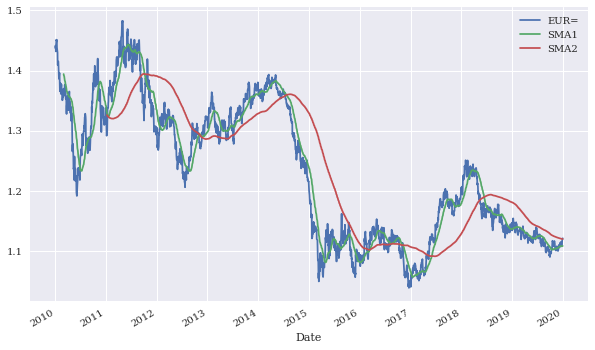

In [9]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

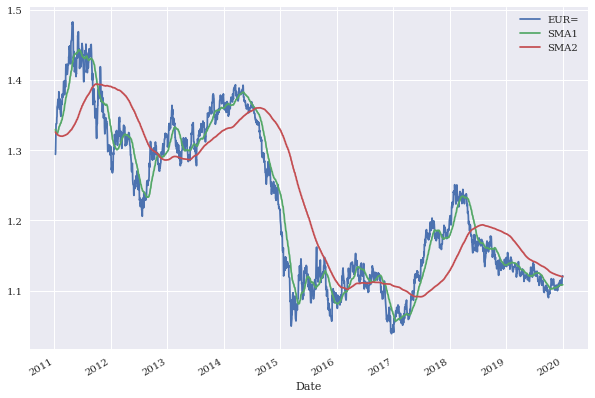

In [7]:
data.dropna(inplace=True)
data.plot(figsize=(10,7))

In [8]:
data['p']=np.where(data['SMA1']>data['SMA2'],1,-1)

In [9]:
data['p']=data['p'].shift(1)
data.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

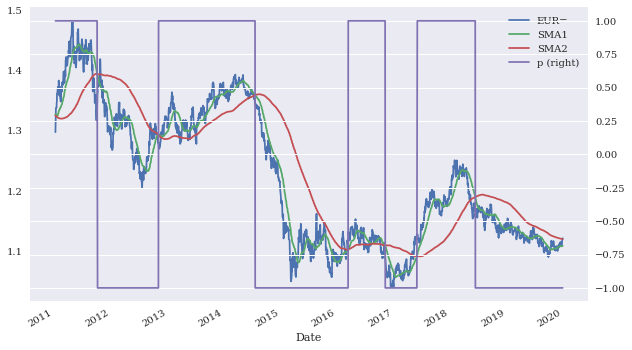

In [10]:
data.plot(figsize=(10,6),secondary_y='p')

In [11]:
data['return']=np.log(data[symbol]/data[symbol].shift(1))
data.dropna(inplace=True)
data['strategy']=data['p']*data['return']
data

,EUR=,SMA1,SMA2,p,return,strategy
Date,,,,,,
2011-01-12,1.3135,1.3265,1.3248,1.0000,0.0123,0.0123
2011-01-13,1.3354,1.3256,1.3244,1.0000,0.0165,0.0165
2011-01-14,1.3375,1.3252,1.3241,1.0000,0.0016,0.0016
2011-01-18,1.3379,1.3249,1.3237,1.0000,0.0003,0.0003
2011-01-19,1.3466,1.3248,1.3232,1.0000,0.0065,0.0065
...,...,...,...,...,...,...
2019-12-24,1.1087,1.1077,1.1201,-1.0000,0.0001,-0.0001
2019-12-26,1.1096,1.1077,1.1200,-1.0000,0.0008,-0.0008
2019-12-27,1.1175,1.1079,1.1199,-1.0000,0.0071,-0.0071


In [14]:
data[['return','strategy']].sum().apply(np.exp)

return     0.8640
strategy   1.3773
dtype: float64

<AxesSubplot:xlabel='Date'>

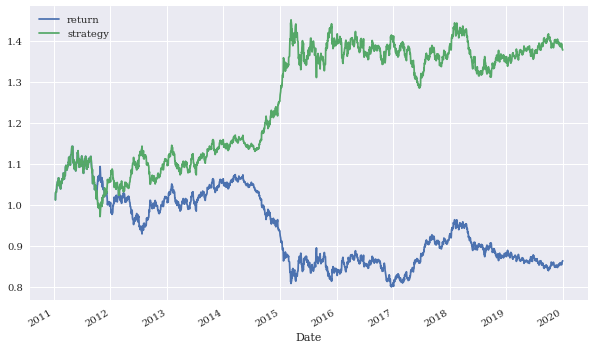

In [15]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [16]:
#考虑交易成本

In [17]:
sum(data['p'].diff() !=0)+1

9

In [18]:
pc=0.0005

In [19]:
data['s_']=np.where(data['p'].diff() !=0,data['strategy']-2*pc,data['strategy'])
#由于是平多单然后开空单 所以是2* pc 手续费

In [20]:
data

,EUR=,SMA1,SMA2,p,return,strategy,s_
Date,,,,,,,
2011-01-12,1.3135,1.3265,1.3248,1.0000,0.0123,0.0123,0.0113
2011-01-13,1.3354,1.3256,1.3244,1.0000,0.0165,0.0165,0.0165
2011-01-14,1.3375,1.3252,1.3241,1.0000,0.0016,0.0016,0.0016
2011-01-18,1.3379,1.3249,1.3237,1.0000,0.0003,0.0003,0.0003
2011-01-19,1.3466,1.3248,1.3232,1.0000,0.0065,0.0065,0.0065
...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.1077,1.1201,-1.0000,0.0001,-0.0001,-0.0001
2019-12-26,1.1096,1.1077,1.1200,-1.0000,0.0008,-0.0008,-0.0008
2019-12-27,1.1175,1.1079,1.1199,-1.0000,0.0071,-0.0071,-0.0071


In [21]:
data['s_'].iloc[-1] -=pc

In [22]:
data[['return','strategy','s_']][data['p'].diff()!=0]

,return,strategy,s_
Date,,,
2011-01-12,0.0123,0.0123,0.0113
2011-10-10,0.0198,-0.0198,-0.0208
2012-11-07,-0.0034,-0.0034,-0.0044
2014-07-24,-0.0001,0.0001,-0.0009
2016-03-16,0.0102,0.0102,0.0092
2016-11-10,-0.0018,0.0018,0.0008
2017-06-05,-0.0025,-0.0025,-0.0035
2018-06-15,0.0035,-0.0035,-0.0045


<AxesSubplot:xlabel='Date'>

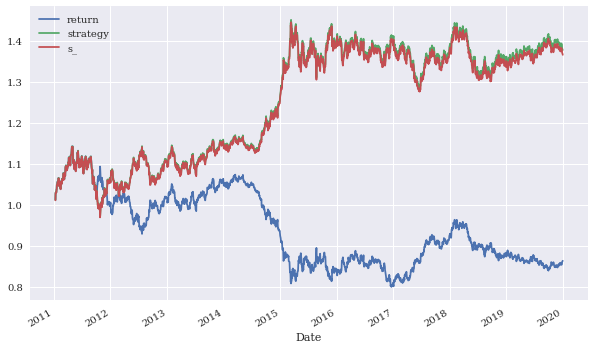

In [23]:
data[['return','strategy','s_']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [24]:
data[['return','strategy','s_']].std()

return     0.0054
strategy   0.0054
s_         0.0054
dtype: float64

In [26]:
# 忍受了同样的风险， 双均线策略更好  波动度

In [27]:
data[['return','strategy','s_']].std()*math.sqrt(252)

return     0.0853
strategy   0.0853
s_         0.0853
dtype: float64

# daily DNN based strategy


In [29]:
data=pd.DataFrame(pd.read_csv(url,index_col=0,parse_dates=True).dropna()[symbol])
data

,EUR=
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [30]:
lags=5

In [31]:
def add_lags(data,symbol,lags,window=20):
    cols=[]
    df=data.copy()
    df.dropna(inplace=True)
    
    df['r']=np.log(df/df.shift(1))
    df['sma']=df[symbol].rolling(window).mean()
    df['min']=df[symbol].rolling(window).min()
    df['max']=df[symbol].rolling(window).max()
    df['mom']=df[symbol].rolling(window).mean()
    df['vol']=df[symbol].rolling(window).std()
    df.dropna(inplace=True)
    df['d']=np.where(df['r']>0,1,0)
    features=[symbol,'r','d','sma','min','max','mom','vol']
    for f in features:
        for lag in range(1,lags+1):
            col=f'{f}__lag__{lag}'
            df[col]=df[f].shift(lag)
            cols.append(col)
            
    df.dropna(inplace=True)
    return df,cols

In [32]:
data,cols=add_lags(data,symbol,lags,window=60)

In [33]:
data.shape

(2452, 48)

In [35]:
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [36]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [37]:
optimizer=Adam(learning_rate=0.0001)

In [38]:
def create_model(hl=2,hu=128,dropout=False,rate=0.3,regularize=False,reg=l1(0.0005),optimizer=optimizer,input_dim=len(cols)):
    if not regularize:
        reg=None
        
    model= Sequential()
    model.add(Dense(hu,input_dim=input_dim,activity_regularizer=reg,activation='relu'))
    if dropout:
        model.add(Dense(hu,activation='relu',activity_regularizer=reg))
    if dropout:
        model.add(Dropout(rate,seed=100))
        
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [39]:
split='2018-01-01'

In [40]:
train=data.loc[:split].copy()
train.shape

(1949, 48)

In [41]:
np.bincount(train['d'])

array([963, 986], dtype=int64)

In [42]:
train

,EUR=,r,sma,min,max,mom,vol,d,EUR=__lag__1,EUR=__lag__2,...,mom__lag__1,mom__lag__2,mom__lag__3,mom__lag__4,mom__lag__5,vol__lag__1,vol__lag__2,vol__lag__3,vol__lag__4,vol__lag__5
Date,,,,,,,,,,,,,,,,,,,,,
2010-04-07,1.3340,-0.0043,1.3752,1.3278,1.4513,1.3752,0.0309,0,1.3398,1.3483,...,1.3770,1.3785,1.3800,1.3814,1.3829,0.0316,0.0320,0.0328,0.0334,0.0341
2010-04-08,1.3358,0.0013,1.3733,1.3278,1.4510,1.3733,0.0297,1,1.3340,1.3398,...,1.3752,1.3770,1.3785,1.3800,1.3814,0.0309,0.0316,0.0320,0.0328,0.0334
2010-04-09,1.3496,0.0103,1.3716,1.3278,1.4510,1.3716,0.0281,1,1.3358,1.3340,...,1.3733,1.3752,1.3770,1.3785,1.3800,0.0297,0.0309,0.0316,0.0320,0.0328
2010-04-12,1.3584,0.0065,1.3700,1.3278,1.4502,1.3700,0.0261,1,1.3496,1.3358,...,1.3716,1.3733,1.3752,1.3770,1.3785,0.0281,0.0297,0.0309,0.0316,0.0320
2010-04-13,1.3606,0.0016,1.3686,1.3278,1.4382,1.3686,0.0240,1,1.3584,1.3496,...,1.3700,1.3716,1.3733,1.3752,1.3770,0.0261,0.0281,0.0297,0.0309,0.0316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,1.1857,-0.0013,1.1764,1.1585,1.1930,1.1764,0.0086,0,1.1873,1.1869,...,1.1763,1.1761,1.1760,1.1760,1.1763,0.0085,0.0084,0.0083,0.0083,0.0087
2017-12-26,1.1858,0.0001,1.1765,1.1585,1.1930,1.1765,0.0087,1,1.1857,1.1873,...,1.1764,1.1763,1.1761,1.1760,1.1760,0.0086,0.0085,0.0084,0.0083,0.0083
2017-12-27,1.1886,0.0024,1.1768,1.1585,1.1930,1.1768,0.0088,1,1.1858,1.1857,...,1.1765,1.1764,1.1763,1.1761,1.1760,0.0087,0.0086,0.0085,0.0084,0.0083


In [43]:
mu,std=train.mean(),train.std()
train_=(train-mu)/std

In [44]:
set_seeds()
model=create_model(hl=2,hu=64)

In [46]:
%%time
model.fit(train_[cols],train['d'],epochs=20,verbose=False,validation_split=0.2,shuffle=False)

Wall time: 1.45 s


In [47]:
model.evaluate(train_[cols],train['d'])

61/61 [==============================] - 0s 605us/step - loss: 0.6929 - accuracy: 0.5187


[0.6928510069847107, 0.5187275409698486]

In [48]:
train['p']=np.where(model.predict(train_[cols])>0.5,1,0)

In [50]:
train['p']=np.where(train['p']==1,1,-1)

In [52]:
train['p'].value_counts()

-1    1033
 1     916
Name: p, dtype: int64

In [53]:
train['s']=train['p']*train['r']

In [56]:
train[['r','s']].sum().apply(np.exp)

r   0.8954
s   1.2877
dtype: float64

In [57]:
test=data.loc[split:].copy()

In [58]:
test.shape

(503, 48)

In [59]:
test_=(test-mu)/std

In [60]:
model.evaluate(test_[cols],test['d'])

16/16 [==============================] - 0s 935us/step - loss: 0.6951 - accuracy: 0.5268


[0.6951092481613159, 0.5268389582633972]

In [62]:
test['p']=np.where(model.predict(test_[cols])>0.5,1,-1)

In [64]:
test['p'].value_counts()

-1    327
 1    176
Name: p, dtype: int64

In [66]:
test['s']=test['p']*test['r']

In [67]:
test[['r','s']].sum().apply(np.exp)

r   0.9345
s   1.1627
dtype: float64

In [68]:
test[['r','s']].sum().apply(np.exp)-1

r   -0.0655
s    0.1627
dtype: float64

<AxesSubplot:xlabel='Date'>

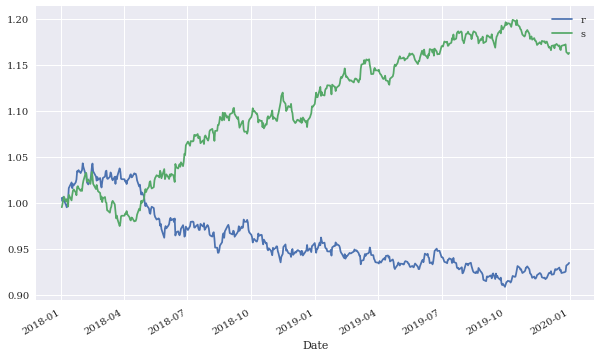

In [69]:
test[['r','s']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [70]:
sum(test['p'].diff()!=0)+1

235

In [71]:
#fixes the average bid-ask apread

In [72]:
spread=0.00012
pc=spread/data[symbol].mean()
print(f'{pc:.6f}')

0.000098


In [73]:
test['s_']=np.where(test['p'].diff()!=0,test['s']-pc,test['s'])

In [74]:
test[['r','s','s_']].sum().apply(np.exp)

r    0.9345
s    1.1627
s_   1.1364
dtype: float64

<AxesSubplot:xlabel='Date'>

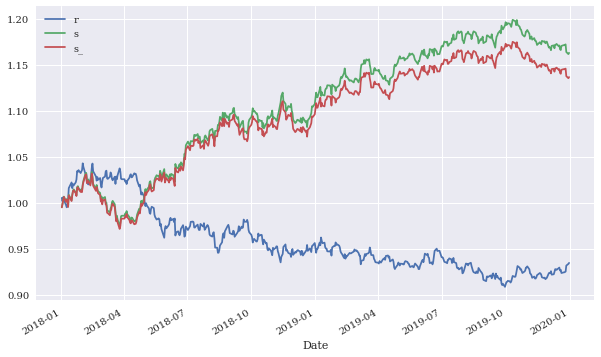

In [76]:
test[['r','s','s_']].cumsum().apply(np.exp).plot(figsize=(10,6))